This notebook will:
- Extract CSV Data: Obtain a CSV file of the respective holders using M1 Finance's built-in CSV export feature.
- Calculate Metrics: Add Beta and Standard Deviation to the data for the respective time frequencies.
- Export Portfolio Stats: Save the final portfolio statistics to a file upon completion.
- Plot Analysis: Visualize total risk and return over a specified time frame.
- Note: 
    - This notebook assumes you are using macOS 
    - That the file is downloaded to the Desktop, and relfects todays date

Libraries

In [2]:
from datetime import datetime, timedelta, date
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.stock_utils import StockAnalysis, StockRatios, analyze_stocks
from utils.plotting_utils import risk_return_plot

Global Varibales

In [3]:
# Put user name here
user = 'blakeuribe'
sns.set_style('darkgrid')
plt.style.use('dark_background')

Time Variables

In [4]:
historical_years = 5
time_freq = '1d'

# Change start date accordingly 
todays_date = date.today()
start_date = datetime.now() - timedelta(days=historical_years*365)

Import Paths

In [5]:
# Asjust file path
formatted_date = todays_date.strftime('%b-%d-%Y')
file_path = f'/Users/{user}/Desktop/Holdings-{formatted_date}.csv'

try:
    raw_portfolio_df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError('Enter User, or select updated CSV file from M1 Finance.')

Export Paths

In [6]:
export_path = f'data/portfolio_info_{todays_date}.csv'
figures_path = f'/Users/{user}/Desktop/opt_portfolio/figures'

Analysis

In [7]:
symbols = raw_portfolio_df['Symbol'].values
combined_summary_df = analyze_stocks(symbols, start_date, todays_date, time_freq)
portfolio_df = pd.merge(raw_portfolio_df, combined_summary_df, on='Symbol', how='outer')
portfolio_df = portfolio_df.copy().round(2)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Graphs

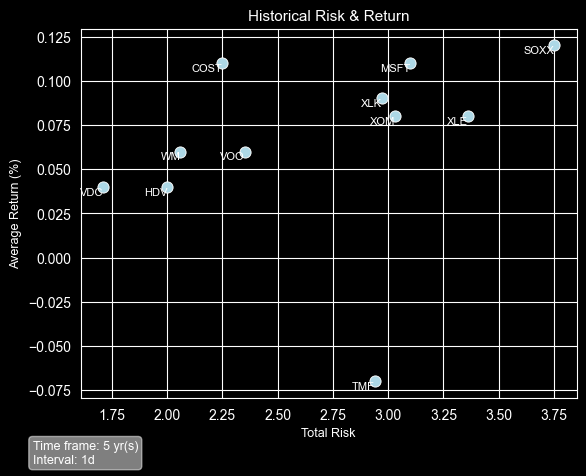

<Figure size 640x480 with 0 Axes>

In [8]:
plot = risk_return_plot(portfolio_df, 'Total_Risk', 'Average_Return(%)', historical_years=historical_years, time_freq=time_freq)
plt.savefig(f'{figures_path}/risk_return.png')

File Export

In [9]:
portfolio_df.to_csv(f'/Users/{user}/Desktop/opt_portfolio/data/portfolio_stats_{formatted_date}.csv')

In [10]:
portfolio_df

,Symbol,Name,Quantity,Avg. Price,Cost Basis,Unrealized Gain ($),Unrealized Gain (%),Value,Average_Return(%),Beta,Standard_Deviation(%),Total_Risk
0,COST,Costco Wholesale Corp.,0.77,529.48,407.5,250.48,61.47,657.98,0.11,0.73,1.52,2.25
1,HDV,iShares Core High Dividend ETF,53.55,97.62,"5,227.94",864.77,16.54,"6,092.71",0.04,0.78,1.22,2.00
2,MSFT,Microsoft,1.60,382.22,612.26,38.12,6.23,650.38,0.11,1.19,1.91,3.10
3,SOXX,iShares PHLX Semiconductor ETF,5.22,175.96,919.41,187.13,20.35,"1,106.54",0.12,1.46,2.29,3.75
4,TMF,Direxion Daily 20+ Year Treasury Bull 3X Shares,14.89,51.31,764.01,64.33,8.42,828.34,-0.07,-0.40,3.34,2.94
5,VDC,Vanguard Consumer Staples ETF,19.13,187.85,"3,593",406.57,11.32,"3,999.57",0.04,0.64,1.07,1.71
6,VOO,Vanguard S&P 500 ETF,17.94,413.51,"7,419.13","1,369.11",18.45,"8,788.24",0.06,1.01,1.34,2.35
7,WM,"Waste Management, Inc.",1.89,164.30,310.72,77.45,24.93,388.17,0.06,0.64,1.42,2.06
8,XLE,Energy Select Sector SPDR Fund,21.70,82.26,"1,785.22",155.14,8.69,"1,940.36",0.08,1.06,2.30,3.36
9,XLK,Technology Select Sector SPDR Fund,12.83,188.46,"2,418.19",220.31,9.11,"2,638.5",0.09,1.23,1.74,2.97


Financial Ratios

In [14]:
portfolio_ratio_df = StockRatios(portfolio_df['Symbol']).get_ratio_df()
portfolio_ratio_df

,Symbol,Gross_Profit_Margin
Date,,
2024-05-31,COST,12.547210
2024-06-30,MSFT,69.589198
2024-06-30,WM,39.078119
2024-06-30,XOM,22.443491


In [15]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
table = pd.read_html(url, header=0)

sp500_df = table[0]
sp500_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [17]:
spy_ratio = StockRatios(sp500_df['Symbol']).get_ratio_df()
spy_ratio

,Symbol,Gross_Profit_Margin
Date,,
2024-06-30,MMM,42.909672
2024-06-30,AOS,38.660549
2024-06-30,ABT,55.642286
2024-06-30,ABBV,70.944544
2024-05-31,ACN,33.391076
...,...,...
2024-06-30,XYL,37.759336
2024-06-30,YUM,49.290981
2024-06-30,ZBRA,48.397699
